In [38]:
# load data
import pandas as pd
covid=pd.read_csv('data_science/covid.csv')
covid=covid.fillna(0)
# Convert cột Date sang kiểu ngày tháng 
covid.Date=pd.to_datetime(covid['Date'])
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231176 entries, 0 to 231175
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Date            231176 non-null  datetime64[ns]
 1   Country/Region  231176 non-null  object        
 2   Province/State  231176 non-null  object        
 3   Confirmed       231176 non-null  int64         
 4   Recovered       231176 non-null  float64       
 5   Deaths          231176 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 10.6+ MB


In [42]:
# Biểu đồ ca nhiễm toàn thế giới trong năm nhập vào
nam=input()
nam=int(nam)
country=input() # yêu cầu người dùng nhập tên nước muốn xem dữ liêu

In [43]:
# 
import numpy as np
# khoi tạo mảng 12 giá trị tương ứng với 12 tháng, giá trị ban đầu là 0
np_covid=covid.to_numpy()
#  Lưu dữ liệu toàn thế giới
confirmed=np.zeros(12)
deaths=np.zeros(12)
resolvered=np.zeros(12)
# Lưu dữ liệu của 1 quốc gia cụ thể
confirmed_c=np.zeros(12)
deaths_c=np.zeros(12)
resolvered_c=np.zeros(12)
for ngaythang,nuoc,tinh,nhiem,khoi,tuvong in np_covid:
    #for thang in range(1,13):        
    if ngaythang.year==nam and ngaythang.is_month_end: # Nếu năm nhập vào trung với năm của hàng tương ứng trong bảng covid
        confirmed[ngaythang.month-1]+=nhiem 
        deaths[ngaythang.month-1]+=tuvong
        resolvered[ngaythang.month-1]+=khoi   
        if country.lower()==nuoc.lower():
            confirmed_c[ngaythang.month-1]=nhiem
            deaths_c[ngaythang.month-1]=tuvong
            resolvered[ngaythang.month-1]=khoi


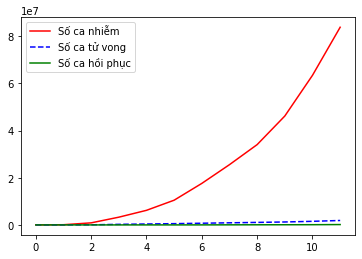

In [44]:
# ve do thị
import matplotlib.pyplot as plt
plt.plot(confirmed,'r',label='Số ca nhiễm')
plt.plot(deaths,'b--',label='Số ca tử vong')
plt.plot(resolvered,'g',label='Số ca hồi phục')
plt.legend()
#print(nhiem)

In [ ]:
# Vẽ biểu đồ của 1 quốc gai cụ thêr
plt.plot(confirmed_c,'r',label='Số ca nhiễm')
plt.plot(deaths_c,'b--',label='Số ca tử vong')
plt.plot(resolvered_c,'g',label='Số ca hồi phục')
plt.legend()